In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.linalg import eig

In [5]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [6]:
df=pd.DataFrame(data,columns=["math","Bio"])

In [7]:
df

,math,Bio
0,3,4
1,2,8
2,6,9
3,10,12


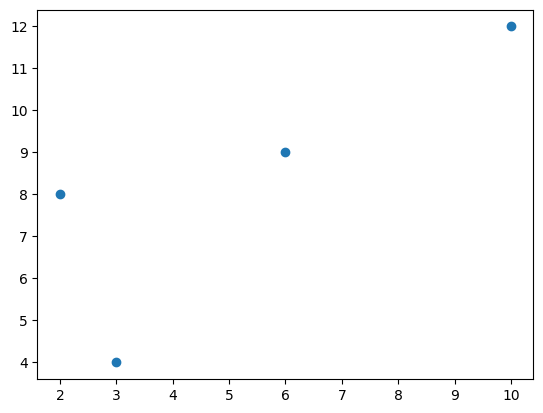

In [8]:
plt.scatter(df["math"],df["Bio"])

In [ ]:
standarizaton of the data
find out coverience matrix from the data
eig value and eig vector
find the principle component


In [42]:
meanbycol=np.mean(data,axis=0)

In [12]:
meanbycol

array([5.25, 8.25])

In [14]:
scaled_data=data-meanbycol

In [15]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [17]:
stdbycol=np.std(data,axis=0)

In [18]:
scaled_data/stdbycol

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [21]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
st.fit_transform(df)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [22]:
np.cov(scaled_data)

array([[ 2. , -3. ,  0. ,  1. ],
       [-3. ,  4.5,  0. , -1.5],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 1. , -1.5,  0. ,  0.5]])

In [23]:
scaled_data.T

array([[-2.25, -3.25,  0.75,  4.75],
       [-4.25, -0.25,  0.75,  3.75]])

In [24]:
np.cov(scaled_data.T)

array([[12.91666667,  9.58333333],
       [ 9.58333333, 10.91666667]])

In [25]:
cov_mat=np.cov(scaled_data.T)

In [26]:
cov_mat

array([[12.91666667,  9.58333333],
       [ 9.58333333, 10.91666667]])

In [43]:
eig(cov_mat)

(array([21.55203266,  2.28130068]),
 array([[ 0.74289445, -0.66940857],
        [ 0.66940857,  0.74289445]]))

In [44]:
eig_value,eig_vector=eig(cov_mat)

In [45]:
eig_vector

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [46]:
eig_value

array([21.55203266,  2.28130068])

In [47]:
scaled_data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [49]:
eig_value.T.dot(scaled_data.T).T

array([-58.18760135, -70.61443131,  17.875     , 110.92703266])

In [50]:
from sklearn.decomposition import PCA
pca=PCA()


In [51]:
pca.fit_transform(scaled_data)

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [33]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=["PC1","PC2"])

,PC1,PC2
0,-4.516499,-1.651132
1,-2.581759,1.989854
2,1.059227,0.055114
3,6.039031,-0.393837


In [52]:
sum(pca.explained_variance_ratio_)

1.0

In [53]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [37]:
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [54]:
df.columns

Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

df.drop(["Id number","Type of glass"],axis=1)

In [55]:
df.drop(["Id number","Type of glass"],axis=1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [57]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [60]:
from sklearn.preprocessing import  StandardScaler
scaler=StandardScaler()

In [61]:
scaled_df=scaler.fit_transform(df)

In [62]:
scaled_df

array([[-1.72397593,  0.87286765,  0.28495326, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-1.70778837, -0.24933347,  0.59181718, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       [-1.6916008 , -0.72131806,  0.14993314, ..., -0.35287683,
        -0.5864509 , -0.84827468],
       ...,
       [ 1.6916008 ,  0.75404635,  1.16872135, ...,  2.95320036,
        -0.5864509 ,  2.01047778],
       [ 1.70778837, -0.61239854,  1.19327046, ...,  2.81208731,
        -0.5864509 ,  2.01047778],
       [ 1.72397593, -0.41436305,  1.00915211, ...,  3.01367739,
        -0.5864509 ,  2.01047778]])

In [63]:
pcal=PCA()
pca_data=pcal.fit_transform(scaled_df)

In [64]:
pd.DataFrame(pca_data)

,0,1,2,3,4,5,6,7,8,9,10
0,-2.145401,0.264014,-0.387762,1.765823,-0.266842,0.489990,-0.462158,0.164977,0.536417,0.133907,0.028925
1,-1.289108,-1.200197,-0.554531,0.882826,-0.282599,0.457016,-0.372088,0.916359,0.350000,-0.115547,-0.003193
2,-1.163621,-1.579327,-0.559147,0.342617,-0.269158,0.727045,-0.665280,0.725821,0.217242,0.019653,0.029552
3,-1.618372,-0.979452,-0.142261,0.485544,-0.503268,0.654993,-0.244923,0.532623,0.273439,0.179534,0.102463
4,-1.544870,-1.208490,-0.515592,0.147664,-0.460850,0.702207,-0.059949,0.634911,0.342089,-0.002751,0.010777
...,...,...,...,...,...,...,...,...,...,...,...
209,4.607953,0.325086,0.241436,-0.023789,0.074964,0.731737,-1.353036,-0.182594,-0.169910,0.112793,-0.028462
210,4.637589,0.337859,-0.948216,0.671121,0.602235,0.998839,0.510864,0.277767,-0.223924,0.006656,-0.016166
211,4.359686,1.010190,-0.777018,0.209719,0.420830,1.483192,0.757703,-0.073551,0.447834,-0.767777,0.039716
212,4.478174,0.166917,-1.095529,-0.169697,0.487436,1.275969,0.712141,0.040196,-0.166019,-0.019203,-0.030061


In [65]:
pcal.explained_variance_ratio_

array([3.33331447e-01, 2.14064700e-01, 1.28161256e-01, 1.06886695e-01,
       8.31641091e-02, 5.51906472e-02, 3.36650601e-02, 3.29466941e-02,
       7.63159290e-03, 4.81504295e-03, 1.42755190e-04])

In [66]:
max(pcal.explained_variance_ratio_)

0.33333144741005366

In [67]:
min(pcal.explained_variance_ratio_)

0.00014275518994368597

In [68]:
sum(pcal.explained_variance_ratio_)

0.9999999999999998

In [69]:
sum(sorted(pcal.explained_variance_ratio_))

0.9999999999999998

In [70]:
sum(sorted(pcal.explained_variance_ratio_,reverse=True)[:7])*100

95.44639148168761

In [71]:
var=pcal.explained_variance_ratio_

In [72]:
var

array([3.33331447e-01, 2.14064700e-01, 1.28161256e-01, 1.06886695e-01,
       8.31641091e-02, 5.51906472e-02, 3.36650601e-02, 3.29466941e-02,
       7.63159290e-03, 4.81504295e-03, 1.42755190e-04])

In [73]:
np.cumsum(var)

array([0.33333145, 0.54739615, 0.6755574 , 0.7824441 , 0.86560821,
       0.92079885, 0.95446391, 0.98741061, 0.9950422 , 0.99985724,
       1.        ])

<function matplotlib.pyplot.show(close=None, block=None)>

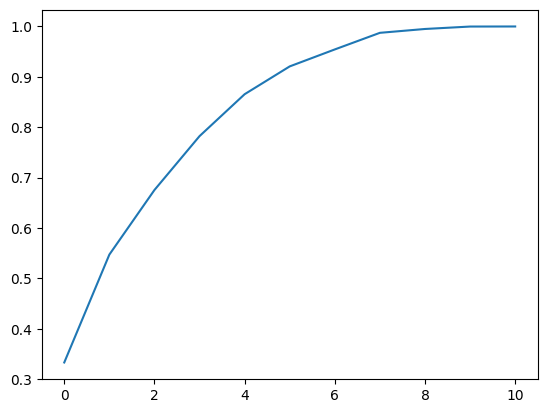

In [74]:
plt.plot(np.cumsum(var))
plt.show